In [ ]:
#-------INSTALL BASEMAP ---------------------------------------
!sudo apt-get install python-grib 
#--------------------------------------------------------------
#       NOTAS
#!sudo python setup.py install
#!sudo apt-get install libgeos-dev 
#!sudo pip3 install -U git+https://github.com/matplotlib/basemap.git
#https://jswhit.github.io/pygrib/docs/--- leitura e gravação de arquivos GRIB 
#-------------------------------------------------------------------------
#Instalar o Pyproj
!pip install -q pyproj==2.3.0

#Install Basemap 
!apt-get install -q libgeos-dev

!pip install -q https://github.com/matplotlib/basemap/archive/master.zip

!pip install netCDF4

!pip install cartopy

!pip install metpy==1.0
#--------------------------------------------------CONSULTA---------------------
#https://unidata.github.io/python-gallery/examples/MSLP_temp_winds.html
#https://wrf-python.readthedocs.io/en/latest/plot.html
!pip install siphon


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libeccodes-data libeccodes-dev libeccodes0 libgrib2c-dev libgrib2c0d
  python-grib-doc python-pyproj python3-grib python3-numpy python3-pyproj
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  libeccodes-data libeccodes-dev libeccodes0 libgrib2c-dev libgrib2c0d
  python-grib python-grib-doc python-pyproj python3-grib python3-numpy
  python3-pyproj
0 upgraded, 11 newly installed, 0 to remove and 37 not upgraded.
Need to get 26.4 MB of archives.
After this operation, 133 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libeccodes-data all 2.6.0-2 [1,260 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libeccodes0 amd64 2.6.0-2 [1,601 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libecc

In [ ]:
#-----MAPAS-----#####################
!pip install cartopy
!pip install shapely --no-binary shapely --force
print('\n')

# Baixando o shapefile dos estados brasileiros
!wget -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
print('\n')

# Descomprimindo o arquivo de shapefile dos estados brasileiros
!unzip -o br_unidades_da_federacao.zip
print('\n')

# Baixando o shapefile dos estados / províncias mundiais
!wget -c https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_provinces.zip
print('\n')

# Descomprimindo o arquivo de shapefile dos estados / províncias mundiais
!unzip -o ne_10m_admin_1_states_provinces.zip
print('\n')

# Download do script "utilities.py", do curso de processamento de satélites, com algumas funções que facilitam a manipulação de dados de satélite
!wget -c https://www.dropbox.com/s/i8j1g9xg1g7o56l/utilities.py
print('\n')

# Download da arquivo CPT exemplo (para realce de canais IR)
!wget -c https://www.dropbox.com/s/fdgnaqt91cy3x97/IR4AVHRR6.cpt
print('\n')

# Download da arquivo CPT exemplo (para realce de canais WV)
!wget -c https://www.dropbox.com/s/4l9fys6pv5c68xk/SVGAWVX_TEMP.cpt
print('\n')

###########################################################

     |████████████████████████████████| 278 kB 6.7 MB/s 
Skipping wheel build for shapely, due to binaries being disabled for it.
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.0
    Uninstalling Shapely-1.8.0:
      Successfully uninstalled Shapely-1.8.0
    Running setup.py install for shapely ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


--2021-12-05 18:53:41--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1091

In [ ]:
from datetime import datetime
from metpy.units import units
from netCDF4 import num2date
import numpy as np
import scipy.ndimage as ndimage
from siphon.ncss import NCSS
from matplotlib.cm import get_cmap
import matplotlib.colors as colors
#-----METPY---------------------
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.interpolate import cross_section
#from mpl_toolkits.axes_grid1 import make_axes_locatable
#----------------- DADO ERA5---------------------------------------------------- 
#Script para plotar os dados de msl+ vento  do ERA5: https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=form
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import pandas as pd
import xarray as xr

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader


import datetime as dt 
#import warnings
#warnings.filterwarnings("ignore")
from osgeo import gdal # Import the GDAL library
import matplotlib.cm as cm
from numpy import linspace
from numpy import meshgrid
import glob, os

In [ ]:
#ABRIR O DADO 
df=pd.read_excel('/content/caso jbn dia 14 15utc-00 15 de 07.xlsx')

In [ ]:
df

,level,vento_1,vento_2,vento_3,vento_4,vento_5,vento_6,vento_7,vento_8,vento_9,vento_10
0,900,8.051327,9.880037,10.114793,10.912789,10.189872,12.468411,14.279331,15.263926,14.194850,11.231750
1,850,22.514568,22.709621,17.273146,19.232134,16.291264,15.873854,19.162178,19.577665,16.434967,15.602178
2,800,21.800577,21.723620,21.508675,21.589811,20.462461,17.203976,21.245295,22.944430,17.148230,16.780668
3,750,21.821175,19.650110,18.658066,20.236374,21.152975,19.586073,22.068058,23.231077,19.679040,20.924606
4,700,19.479261,16.942396,17.977673,18.299550,18.868431,21.334215,23.423622,23.244862,23.635320,23.525873
5,650,16.821096,19.627200,19.531061,19.205109,19.940165,21.566711,23.632893,21.916220,21.023378,17.504372
6,600,15.855781,18.786497,18.597176,18.657867,19.949394,21.149693,21.913803,21.841120,18.374847,19.977026
7,550,20.166397,19.501444,21.507260,20.770205,20.939050,23.853113,25.604696,25.581152,21.148798,22.150457
8,500,24.649000,25.930262,25.066927,26.602854,26.876600,27.447588,28.666155,27.080154,23.775930,24.238020
9,450,27.217577,26.913530,28.100069,30.065302,30.605513,30.397448,30.093150,28.513376,25.485788,26.856188


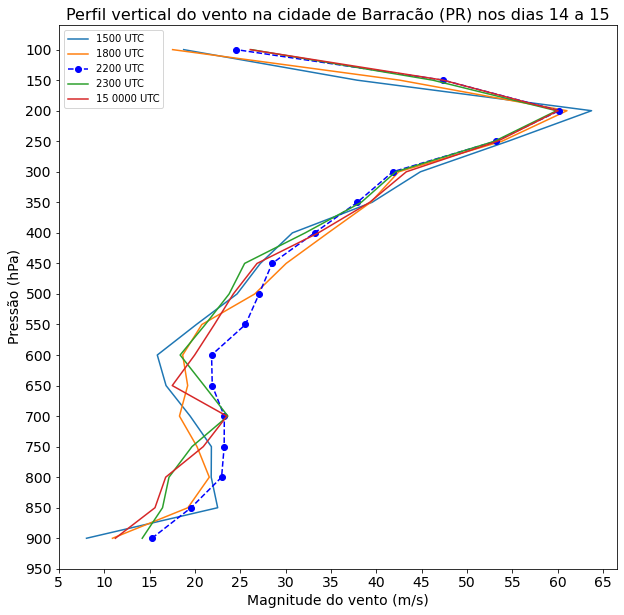

In [ ]:
#Fazendo o plot
fig = plt.figure(figsize=(10,10))

plt.plot(df['vento_1'],df['level'],label='1500 UTC')
#plt.plot(df['vento_2'],df['level'],label='1600 UTC')
#plt.plot(df['vento_3'],df['level'],label='1700 UTC')
plt.plot(df['vento_4'],df['level'],label='1800 UTC')
#plt.plot(df['vento_5'],df['level'],label='1900 UTC')
#plt.plot(df['vento_6'],df['level'],label='2000 UTC')
#plt.plot(df['vento_7'],df['level'],label='2100 UTC')
plt.plot(df['vento_8'],df['level'],'bo--',label='2200 UTC')
plt.plot(df['vento_9'],df['level'],label='2300 UTC')
plt.plot(df['vento_10'],df['level'],label='15 00 UTC')
plt.legend(loc='upper left')

plt.title('Perfil vertical do vento na cidade de Barracão (PR) nos dias 14 a 15',fontsize = 16)
plt.xlabel('Magnitude do vento (m/s)',fontsize = 14)
plt.xticks(ticks=np.arange(5,70,5),fontsize = 14)
plt.yticks(ticks=np.arange(100,1000,50),fontsize = 14)
plt.ylabel('Pressão (hPa)',fontsize = 14)

plt.gca().invert_yaxis()

plt.savefig('perfildovento.png')